# Exploring Mental Health Data

In [2811]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_df = pd.read_csv('ExploringMentalHealthData/train.csv')
train_df= pd.read_csv('ExploringMentalHealthData/train.csv')
train_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


## 0. 기타 전처리
---

### (1) 중복 제거

In [2812]:
train_df = train_df.drop_duplicates()

### (2) 불필요한 컬럼 정리

In [2813]:
train_df.drop(['Name','Gender'], axis=1, inplace=True)

## 1. 데이터 전처리 - 결측치
---
###    (1) 결측치 확인

- Null 값 확인

In [2814]:
isnull_series = train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Academic Pressure     112803
Study Satisfaction    112803
CGPA                  112802
Profession             36630
Work Pressure          27918
Job Satisfaction       27910
Dietary Habits             4
Financial Stress           4
Degree                     2
dtype: int64


- Working Profeesion 과 Student 데이터셋 나누기
- 각각 데이터 셋의 이상치 확인하기

In [2815]:
Working_prof_train_df = train_df[train_df['Working Professional or Student'] == 'Working Professional']
Student_train_df = train_df[train_df['Working Professional or Student'] == 'Student']

- [Working Professional or Student] 컬럼 삭제하기

In [2816]:
Working_prof_train_df.drop(['Working Professional or Student'], axis=1, inplace=True)

In [2817]:
Student_train_df.drop(['Working Professional or Student'], axis=1, inplace=True)

In [2818]:
isnull_series = Working_prof_train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Academic Pressure     112794
Study Satisfaction    112793
CGPA                  112793
Profession              8763
Work Pressure             20
Job Satisfaction          17
Dietary Habits             2
Degree                     2
Financial Stress           1
dtype: int64


In [2819]:
isnull_series = Student_train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Work Pressure         27898
Job Satisfaction      27893
Profession            27867
Study Satisfaction       10
CGPA                      9
Academic Pressure         9
Financial Stress          3
Dietary Habits            2
dtype: int64


### (2) 결측치 제거
- 각각 데이터 셋의 90% 이상의 결측치 제거하기

In [2820]:
cols_to_drop = ['Academic Pressure', 'Study Satisfaction', 'CGPA','Profession']
Working_prof_train_df = Working_prof_train_df.drop(columns=cols_to_drop)

In [2821]:
cols_to_drop = ['Work Pressure', 'Job Satisfaction', 'Profession']
Student_train_df = Student_train_df.drop(columns=cols_to_drop)

### (3) 결측치 채우기
- Working_prof_train_df의 Profession 의 결측치를 'Missing'으로 채우기

In [2822]:
# Working_prof_train_df['Profession'] = Working_prof_train_df['Profession'].fillna('Missing')

### (4) 결측치 확인

In [2823]:
isnull_series = Working_prof_train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Work Pressure       20
Job Satisfaction    17
Dietary Habits       2
Degree               2
Financial Stress     1
dtype: int64


In [2824]:
isnull_series = Student_train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Study Satisfaction    10
Academic Pressure      9
CGPA                   9
Financial Stress       3
Dietary Habits         2
dtype: int64


## 2. 데이터 전처리 - 데이터 정리
---
###    (1) Sleep Duration 이상치 정리 및 데이터 정리
- Sleep Duration 값 확인
- 이상치 제거
- 문자 > 숫자로 변경
  - 구간별 대표 숫자로 변경
  - "1-2 hours" -> 1.5
    

In [2825]:
# 정상적인 수면 시간 값 목록
valid_sleep_values = [
    'More than 8 hours', 'Less than 5 hours', '5-6 hours', '6-7 hours',
    '6-8 hours', '7-8 hours', '8-9 hours', '9-11 hours',
    '4-6 hours', '4-5 hours', '3-4 hours', '2-3 hours', '1-3 hours'
]

# 이상값이 들어있는 행만 DataFrame으로 필터링
abnormal_sleep_df = Working_prof_train_df[~Working_prof_train_df['Sleep Duration'].isin(valid_sleep_values)]

# DataFrame 출력
print("🔍 Sleep Duration 컬럼에 이상값이 포함된 행 (DataFrame 형식):")
display(abnormal_sleep_df)  

🔍 Sleep Duration 컬럼에 이상값이 포함된 행 (DataFrame 형식):


,id,Age,City,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4021,4021,59.0,Ghaziabad,4.0,4.0,Sleep_Duration,Healthy,LLB,Yes,10.0,1.0,No,0
35953,35953,34.0,Thane,3.0,3.0,Sleep_Duration,Moderate,MCA,Yes,9.0,3.0,Yes,0
44890,44890,39.0,Visakhapatnam,3.0,1.0,9-6 hours,Moderate,ME,No,12.0,4.0,No,0
45218,45218,44.0,Meerut,2.0,2.0,Indore,Moderate,MD,No,6.0,4.0,Yes,0
50817,50817,41.0,Faridabad,4.0,4.0,45,Moderate,MD,No,8.0,5.0,No,0
60168,60168,43.0,Lucknow,5.0,4.0,1-6 hours,Moderate,BA,Yes,3.0,4.0,No,0
61185,61185,38.0,Thane,2.0,1.0,35-36 hours,Moderate,BSc,Yes,5.0,5.0,No,0
66929,66929,54.0,Bhopal,3.0,1.0,No,Healthy,MBBS,No,5.0,1.0,No,0
67200,67200,40.0,Varanasi,3.0,2.0,10-6 hours,Healthy,B.Com,Yes,4.0,2.0,No,0
68239,68239,46.0,Bhopal,5.0,3.0,No,Unhealthy,MCA,No,3.0,1.0,Yes,0


In [2826]:
Working_prof_train_df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '6-8 hours', '4-6 hours', '6-7 hours',
       '8-9 hours', '9-11 hours', '2-3 hours', '3-4 hours', '4-5 hours',
       '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', 'No', '10-6 hours', '49 hours', 'Unhealthy',
       'Work_Study_Hours', '3-6 hours', '45-48 hours', '9-5', 'Pune',
       '9-5 hours'], dtype=object)

In [2827]:
# 정상적인 수면 시간 값 목록
valid_sleep_values = [
    'More than 8 hours', 'Less than 5 hours', '5-6 hours', '6-7 hours',
    '6-8 hours', '7-8 hours', '8-9 hours', '9-11 hours',
    '4-6 hours', '4-5 hours', '3-4 hours', '2-3 hours', '1-3 hours'
]

# 이상값이 들어있는 행만 DataFrame으로 필터링
abnormal_sleep_df = Student_train_df[~Student_train_df['Sleep Duration'].isin(valid_sleep_values)]

# DataFrame 출력
print("🔍 Sleep Duration 컬럼에 이상값이 포함된 행 (DataFrame 형식):")
display(abnormal_sleep_df)  # Jupyter 사용 시

🔍 Sleep Duration 컬럼에 이상값이 포함된 행 (DataFrame 형식):


,id,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
10030,10030,30.0,Ludhiana,3.0,5.42,2.0,1-2 hours,Unhealthy,B.Ed,Yes,1.0,2.0,No,0
19051,19051,18.0,Agra,3.0,6.03,4.0,10-11 hours,Unhealthy,BA,Yes,12.0,5.0,No,1
19915,19915,27.0,Ludhiana,4.0,5.08,5.0,40-45 hours,Healthy,M.Tech,Yes,8.0,5.0,Yes,1
27865,27865,31.0,Delhi,2.0,7.27,5.0,Moderate,Healthy,B.Arch,No,3.0,1.0,No,0
29050,29050,23.0,Mumbai,5.0,8.52,4.0,55-66 hours,Moderate,BE,Yes,12.0,4.0,Yes,1
65456,65456,28.0,Nagpur,2.0,7.85,4.0,8 hours,Unhealthy,BA,Yes,10.0,4.0,No,1
72700,72700,33.0,Ahmedabad,4.0,7.87,4.0,45,Moderate,PhD,No,10.0,2.0,Yes,0
75587,75587,26.0,Srinagar,2.0,7.11,4.0,than 5 hours,Unhealthy,PhD,Yes,9.0,2.0,No,0
102871,102871,32.0,Hyderabad,4.0,9.39,2.0,10-11 hours,Healthy,M.Tech,No,4.0,3.0,Yes,1


In [2828]:
valid_sleep_values = [
    'More than 8 hours', 'Less than 5 hours',
    '1-2 hours', '1-3 hours', '2-3 hours', '3-4 hours', '4-5 hours',
    '4-6 hours', '5-6 hours', '6-7 hours', '6-8 hours',
    '7-8 hours', '8-9 hours', '9-11 hours', '10-11 hours'
]

Working_prof_train_df['Sleep Duration'] = Working_prof_train_df['Sleep Duration'].apply(lambda x: x if x in valid_sleep_values else np.nan)

In [2829]:
valid_sleep_values = [
    'More than 8 hours', 'Less than 5 hours',
    '1-2 hours', '1-3 hours', '2-3 hours', '3-4 hours', '4-5 hours',
    '4-6 hours', '5-6 hours', '6-7 hours', '6-8 hours',
    '7-8 hours', '8-9 hours', '9-11 hours', '10-11 hours'
]

Student_train_df['Sleep Duration'] = Student_train_df['Sleep Duration'].apply(lambda x: x if x in valid_sleep_values else np.nan)

In [2830]:
#일관된 값으로 변환하는 코드
def convert_sleep_duration(value):
    if value == 'More than 8 hours':
        return 9.0
    elif value == 'Less than 5 hours':
        return 4.0
    else:
        # "숫자-숫자 hours" 형태일 때 중간값 계산
        try:
            parts = value.replace(' hours', '').split('-')
            if len(parts) == 2:
                return (float(parts[0]) + float(parts[1])) / 2
            else:
                return float(parts[0])  # 혹시 단일 숫자면 그대로
        except:
            return None  # 변환 불가한 값은 None 처리

list = [Working_prof_train_df, Student_train_df]

# 적용 예시
for df in list: 
    df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)


In [2831]:
Working_prof_train_df

,id,Age,City,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,Ludhiana,5.0,2.0,9.0,Healthy,BHM,No,1.0,2.0,No,0
1,1,26.0,Varanasi,4.0,3.0,4.0,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,22.0,Mumbai,5.0,1.0,4.0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,30.0,Kanpur,1.0,1.0,5.5,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,59.0,Ahmedabad,2.0,5.0,5.5,Healthy,MCA,No,7.0,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,45.0,Ahmedabad,2.0,5.0,4.0,Moderate,B.Ed,Yes,1.0,5.0,No,0
140695,140695,18.0,Ahmedabad,5.0,4.0,5.5,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,41.0,Hyderabad,5.0,4.0,7.5,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,24.0,Kolkata,3.0,1.0,9.0,Moderate,B.Com,No,4.0,4.0,No,0


In [2832]:
Working_prof_train_df['Sleep Duration'].median()

np.float64(5.5)

In [2833]:
Working_prof_train_df['Sleep Duration'].fillna(5.5)

0         9.0
1         4.0
3         4.0
4         5.5
5         5.5
         ... 
140694    4.0
140695    5.5
140696    7.5
140697    9.0
140698    5.5
Name: Sleep Duration, Length: 112799, dtype: float64

In [2834]:
Student_train_df['Sleep Duration'].median()

np.float64(5.5)

In [2835]:
Student_train_df['Sleep Duration'].fillna(5.5)

2         5.5
8         5.5
26        4.0
30        7.5
32        5.5
         ... 
140685    5.5
140686    4.0
140689    5.5
140690    4.0
140699    4.0
Name: Sleep Duration, Length: 27901, dtype: float64

###    (2) Gender 데이터 정리
- Male : 0, Female : 1로 변경
    

In [2836]:
# list = [Working_prof_train_df, Student_train_df]

# for df in list : 
#     df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

###    (3) Dietary Habits 데이터 정리
- 정상적이지 않은 값과 정상적인 값을 분류
- 비정상적인 값 제거     
    No Healthy: 0     
    Unhealthy: 1     
    Less than Healthy = Less Healthy: 2        
    Moderate: 3    
    Healthy: 4     
    More Healthy: 5     

In [2837]:
Working_prof_train_df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', 'More Healthy', 'Hormonal', 'Electrician', nan, 'Vegas',
       'No', 'Indoor', 'Class 12'], dtype=object)

In [2838]:
valid_dietary = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy']

abnormal_rows = Working_prof_train_df[~Working_prof_train_df['Dietary Habits'].isin(valid_dietary)]

abnormal_rows

,id,Age,City,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2943,2943,24.0,Patna,3.0,2.0,4.0,Yes,LLB,Yes,3.0,5.0,Yes,0
4495,4495,31.0,Vadodara,4.0,2.0,7.5,Pratham,MCA,Yes,5.0,4.0,No,0
20779,20779,39.0,Mumbai,3.0,2.0,7.5,BSc,MBA,No,6.0,1.0,Yes,0
21736,21736,24.0,Hyderabad,5.0,2.0,9.0,Gender,BCA,Yes,5.0,5.0,No,0
56866,56866,56.0,Meerut,2.0,3.0,4.0,Hormonal,B.Pharm,Yes,11.0,5.0,Yes,0
57597,57597,58.0,Indore,4.0,2.0,4.0,Electrician,MSc,Yes,1.0,1.0,No,0
69581,69581,48.0,Hyderabad,3.0,2.0,4.0,NaN,MBA,No,5.0,4.0,No,0
76436,76436,37.0,Nashik,3.0,3.0,7.5,NaN,ME,No,11.0,1.0,No,0
86011,86011,51.0,Lucknow,2.0,1.0,7.5,Vegas,B.Pharm,No,8.0,2.0,No,0
95502,95502,58.0,Nagpur,3.0,2.0,5.5,No,PhD,No,12.0,1.0,Yes,0


In [2839]:
valid_dietary = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy']

abnormal_rows = Student_train_df[~Student_train_df['Dietary Habits'].isin(valid_dietary)]

abnormal_rows

,id,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
28610,28610,23.0,Meerut,3.0,9.98,5.0,4.0,3,B.Com,Yes,4.0,5.0,No,1
34623,34623,18.0,Vadodara,1.0,6.05,5.0,7.5,Less than Healthy,Class 12,No,4.0,4.0,No,0
41636,41636,21.0,Jaipur,2.0,7.28,4.0,4.0,Mihir,B.Pharm,Yes,0.0,3.0,Yes,0
42616,42616,32.0,Ahmedabad,4.0,9.54,4.0,5.5,1.0,B.Ed,Yes,4.0,2.0,No,1
59350,59350,34.0,Agra,5.0,9.04,1.0,9.0,NaN,B.Tech,Yes,4.0,5.0,Yes,1
64565,64565,23.0,Bangalore,2.0,6.91,5.0,5.5,NaN,M.Pharm,No,6.0,3.0,No,1
69649,69649,34.0,Ahmedabad,5.0,8.24,5.0,5.5,No Healthy,MCA,Yes,11.0,1.0,Yes,1
73210,73210,26.0,Indore,1.0,7.49,2.0,4.0,Less Healthy,LLB,Yes,6.0,4.0,No,0
76041,76041,27.0,Lucknow,5.0,5.82,3.0,4.0,M.Tech,BSc,Yes,7.0,1.0,No,1
113519,113519,30.0,Ghaziabad,5.0,5.99,2.0,7.5,Male,M.Ed,Yes,7.0,4.0,No,1


In [2840]:
diet_map = {
    'No Healthy': 0,
    'Unhealthy': 1,
    'Less than Healthy': 2,
    'Less Healthy': 2,
    'Moderate': 3,
    'Healthy': 4,
    'More Healthy': 5
}

# Working_prof_train_df 처리
Working_prof_train_df['Dietary Habits'] = pd.DataFrame({
    'Dietary Habits': ['Healthy', 'Unknown', 'Unhealthy', 'Less Healthy', 'Bad Diet']
})

Working_prof_train_df['Dietary Habits'] = Working_prof_train_df['Dietary Habits'].map(diet_map)

# Student_train_df 처리
Student_train_df['Dietary Habits'] = pd.DataFrame({
    'Dietary Habits': ['Healthy', 'Unknown', 'Unhealthy', 'Less Healthy', 'Bad Diet']
})

Student_train_df['Dietary Habits'] = Student_train_df['Dietary Habits'].map(diet_map)


In [2841]:
Working_prof_train_df['Dietary Habits'].median()

np.float64(3.0)

In [2842]:
Working_prof_train_df['Dietary Habits'] = Working_prof_train_df['Dietary Habits'].fillna(2.0)

In [2843]:
Student_train_df['Dietary Habits'].median()

np.float64(1.0)

In [2844]:
Student_train_df['Dietary Habits'] = Student_train_df['Dietary Habits'].fillna(2.0)

###    (4) Degree 데이터 정리
- 정상적이지 않은 값과 정상적인 값을 분류
- 비정상적인 값 제거
- 학위에 대한 분류를 하여 새로운 컬럼으로 정리
- 기존의 컬럼 제거  

In [2845]:
# Student_train_df['Degree'].unique()

In [2846]:
# Working_prof_train_df['Degree'].unique()

In [2847]:
Student_train_df

,id,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,33.0,Visakhapatnam,5.0,8.97,2.0,5.5,1.0,B.Pharm,Yes,3.0,1.0,No,1
8,8,24.0,Bangalore,2.0,5.90,5.0,5.5,2.0,BSc,No,3.0,2.0,Yes,0
26,26,31.0,Srinagar,3.0,7.03,5.0,4.0,2.0,BA,No,9.0,1.0,Yes,0
30,30,28.0,Varanasi,3.0,5.59,2.0,7.5,2.0,BCA,Yes,4.0,5.0,Yes,1
32,32,25.0,Jaipur,4.0,8.13,3.0,5.5,2.0,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,27.0,Surat,5.0,5.75,5.0,5.5,2.0,Class 12,Yes,7.0,1.0,Yes,0
140686,140686,27.0,Ludhiana,2.0,9.40,3.0,4.0,2.0,MSc,No,0.0,3.0,Yes,0
140689,140689,31.0,Faridabad,3.0,6.61,4.0,5.5,2.0,MD,No,12.0,2.0,No,0
140690,140690,18.0,Ludhiana,5.0,6.88,2.0,4.0,2.0,Class 12,Yes,10.0,5.0,No,1


In [2848]:
# 정상적인 학위 및 그룹핑 사전
degree_group_map = {
    # 의학/보건
    'MD': 'Medical',
    'MBBS': 'Medical',
    'B.Pharm': 'Pharmacy',
    'M.Pharm': 'Pharmacy',
    'MPharm': 'Pharmacy',
    'P.Pharm': 'Pharmacy',
    'S.Pharm': 'Pharmacy',
    'N.Pharm': 'Pharmacy',

    # 공학/기술
    'B.Tech': 'Engineering',
    'M.Tech': 'Engineering',
    'ME': 'Engineering',
    'MTech': 'Engineering',
    'M_Tech': 'Engineering',
    'BE': 'Engineering',
    'BCA': 'Engineering',
    'MCA': 'Engineering',
    'E.Tech': 'Engineering',
    'S.Tech': 'Engineering',
    'LLTech': 'Engineering',
    'LLCom': 'Engineering',

    # 인문/사회/비즈니스
    'BBA': 'Business',
    'MBA': 'Business',
    'M. Business Analyst': 'Business',
    'B.Com': 'Commerce',
    'M.Com': 'Commerce',
    'P.Com': 'Commerce',
    'LLB': 'Law',
    'LLM': 'Law',
    'LLBA': 'Law',
    'LL.Com': 'Law',
    'LL B.Ed': 'Education',
    'B.Ed': 'Education',
    'M.Ed': 'Education',
    'L.Ed': 'Education',
    'K.Ed': 'Education',
    'LLEd': 'Education',
    'BEd': 'Education',

    # 과학
    'BSc': 'Science',
    'MSc': 'Science',
    'B.Sc': 'Science',

    # 기타, 건축, 호텔경영 등
    'BHM': 'Hospitality',
    'MHM': 'Hospitality',
    'B.Arch': 'Architecture',
    'M.Arch': 'Architecture',
    'BArch': 'Architecture',
    'B.B.Arch': 'Architecture',

    # 학위 및 학교 졸업
    'PhD': 'PhD',
    'Class 12': 'School',
    'Class 11': 'School',
}



In [2849]:
Student_train_df['degree_group'] = Student_train_df['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))
Working_prof_train_df['degree_group'] = Working_prof_train_df['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))

In [2850]:
Student_train_df

,id,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,degree_group
2,2,33.0,Visakhapatnam,5.0,8.97,2.0,5.5,1.0,B.Pharm,Yes,3.0,1.0,No,1,Pharmacy
8,8,24.0,Bangalore,2.0,5.90,5.0,5.5,2.0,BSc,No,3.0,2.0,Yes,0,Science
26,26,31.0,Srinagar,3.0,7.03,5.0,4.0,2.0,BA,No,9.0,1.0,Yes,0,Other
30,30,28.0,Varanasi,3.0,5.59,2.0,7.5,2.0,BCA,Yes,4.0,5.0,Yes,1,Engineering
32,32,25.0,Jaipur,4.0,8.13,3.0,5.5,2.0,M.Tech,Yes,1.0,1.0,No,0,Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,27.0,Surat,5.0,5.75,5.0,5.5,2.0,Class 12,Yes,7.0,1.0,Yes,0,School
140686,140686,27.0,Ludhiana,2.0,9.40,3.0,4.0,2.0,MSc,No,0.0,3.0,Yes,0,Science
140689,140689,31.0,Faridabad,3.0,6.61,4.0,5.5,2.0,MD,No,12.0,2.0,No,0,Medical
140690,140690,18.0,Ludhiana,5.0,6.88,2.0,4.0,2.0,Class 12,Yes,10.0,5.0,No,1,School


- Degree 컬럼 제거

In [2851]:
Student_train_df.drop(['Degree'],axis=1,inplace=True)
Working_prof_train_df.drop(['Degree'],axis=1,inplace=True)

In [2852]:
Student_train_df

,id,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,degree_group
2,2,33.0,Visakhapatnam,5.0,8.97,2.0,5.5,1.0,Yes,3.0,1.0,No,1,Pharmacy
8,8,24.0,Bangalore,2.0,5.90,5.0,5.5,2.0,No,3.0,2.0,Yes,0,Science
26,26,31.0,Srinagar,3.0,7.03,5.0,4.0,2.0,No,9.0,1.0,Yes,0,Other
30,30,28.0,Varanasi,3.0,5.59,2.0,7.5,2.0,Yes,4.0,5.0,Yes,1,Engineering
32,32,25.0,Jaipur,4.0,8.13,3.0,5.5,2.0,Yes,1.0,1.0,No,0,Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,27.0,Surat,5.0,5.75,5.0,5.5,2.0,Yes,7.0,1.0,Yes,0,School
140686,140686,27.0,Ludhiana,2.0,9.40,3.0,4.0,2.0,No,0.0,3.0,Yes,0,Science
140689,140689,31.0,Faridabad,3.0,6.61,4.0,5.5,2.0,No,12.0,2.0,No,0,Medical
140690,140690,18.0,Ludhiana,5.0,6.88,2.0,4.0,2.0,Yes,10.0,5.0,No,1,School


# 시도 필요!!
=> 우울률 기반 수치 변수로 변경 (Risk Encoding)

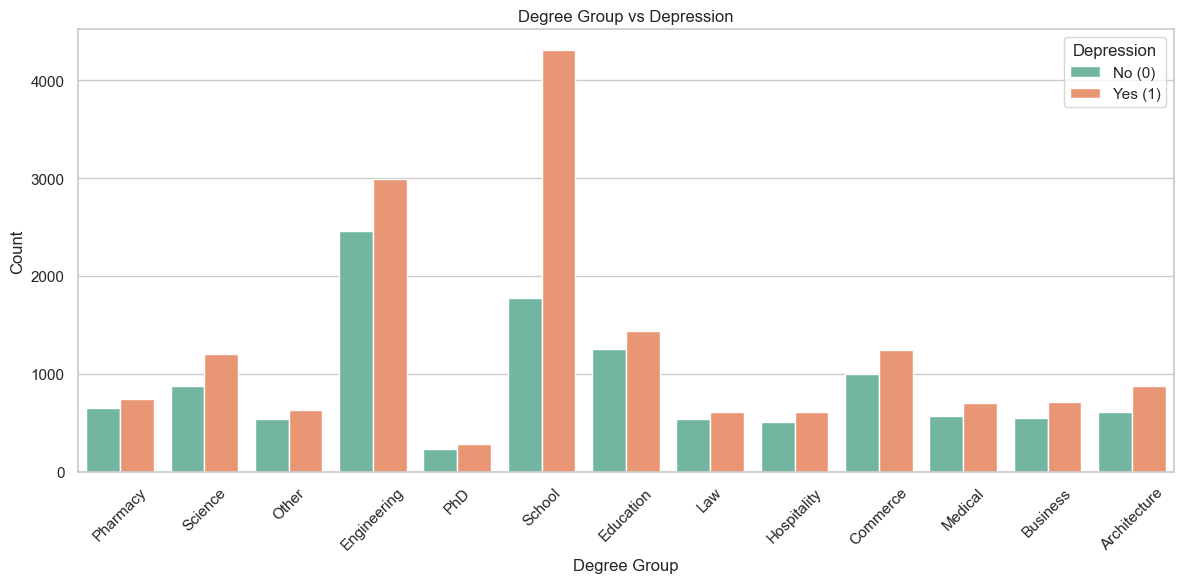

In [2853]:
# 시각화 스타일 설정
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.countplot(data=Student_train_df, x='degree_group', hue='Depression', palette='Set2')

plt.title('Degree Group vs Depression')
plt.xlabel('Degree Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.legend(title='Depression', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

###    (5) Have you ever had suicidal thoughts ? 데이터 정리
- 교차표 (Contingency Table) 확인
  - 자살 생각이 없는 사람(No) 중 우울증(1) 비율:
        2379 / (7864 + 2379) ≈ 2379 / 10243 ≈ 23.2%
    자살 생각이 있는 사람(Yes) 중 우울증(1) 비율:
        13954 / (3698 + 13954) ≈ 13954 / 17652 ≈ 79.0%
- 카이제곱 검정 (Chi-Square Test)
  - 카이제곱 통계량이 아주 크고, P-value가 거의 0에 가까우므로 매우 유의미한 결과이다.
#### 따라서 자살 생각 여부는 우울증 상태와 매우 밀접한 관계가 있다.
- Yes : 1, No : 0으로 변환

In [2856]:
ct = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'])
print(ct)

# 비율 확인
print(ct.div(ct.sum(axis=1), axis=0))

Depression                                0      1
Have you ever had suicidal thoughts ?             
No                                     7866   2379
Yes                                    3699  13957
Depression                                    0         1
Have you ever had suicidal thoughts ?                    
No                                     0.767789  0.232211
Yes                                    0.209504  0.790496


In [2857]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi2 Statistic: 8323.8664
P-value: 0.0000


In [2858]:
list = [Working_prof_train_df, Student_train_df]

for df in list : 
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

###    (6) Age 데이터 정리
<span style="background-color: #ffd33d">Student 데이터에서 40세 이상이지만 최종학력이 고등학생인 데이터 제거 고려 필요</span>


In [2859]:
# Student_train_df = Student_train_df[~((Student_train_df['Age'] >= 40) & (Student_train_df['Degree_Group'] == 'School'))]

###    (5) Family History of Mental Illness 데이터 정리
- Yes : 1, No : 0으로 변환

In [2860]:
ct = pd.crosstab(df['Family History of Mental Illness'], df['Depression'])
print(ct)

# 비율 확인
print(ct.div(ct.sum(axis=1), axis=0))

Depression                           0     1
Family History of Mental Illness            
No                                6335  8063
Yes                               5230  8273
Depression                               0         1
Family History of Mental Illness                    
No                                0.439992  0.560008
Yes                               0.387321  0.612679


In [2861]:
list = [Working_prof_train_df, Student_train_df]

for df in list : 
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

###    (6) City 데이터 정리
- 정상적인 도시 이름과 비정상적인 도시 이름을 구별
- 비정상적인 도시 이름 제거

In [2862]:
# Working_prof_train_df['City'].unique()

In [2863]:
# Student_train_df['City'].unique()

In [2864]:
# 정상적인 도시 이름 리스트 (중복 제거된 신뢰 가능한 도시들)
valid_cities_map = {
    'Visakhapatnam', 'Bangalore', 'Varanasi', 'Jaipur', 'Pune',
    'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan',
    'Rajkot', 'Srinagar', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
    'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
    'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Patna', 'Faridabad',
    'Delhi', 'Kanpur', 'Morena', 'Gurgaon'
}

In [2865]:
Student_train_df['City'] = Student_train_df['City'].apply(lambda x: x if x in valid_cities_map else 'Other')
Working_prof_train_df['City'] = Working_prof_train_df['City'].apply(lambda x: x if x in valid_cities_map else 'Other')

<!-- ###    (7) Profession 데이터 정리
- 정상적인 도시 이름과 비정상적인 도시 이름을 구별
- 비정상적인 도시 이름 제거 -->

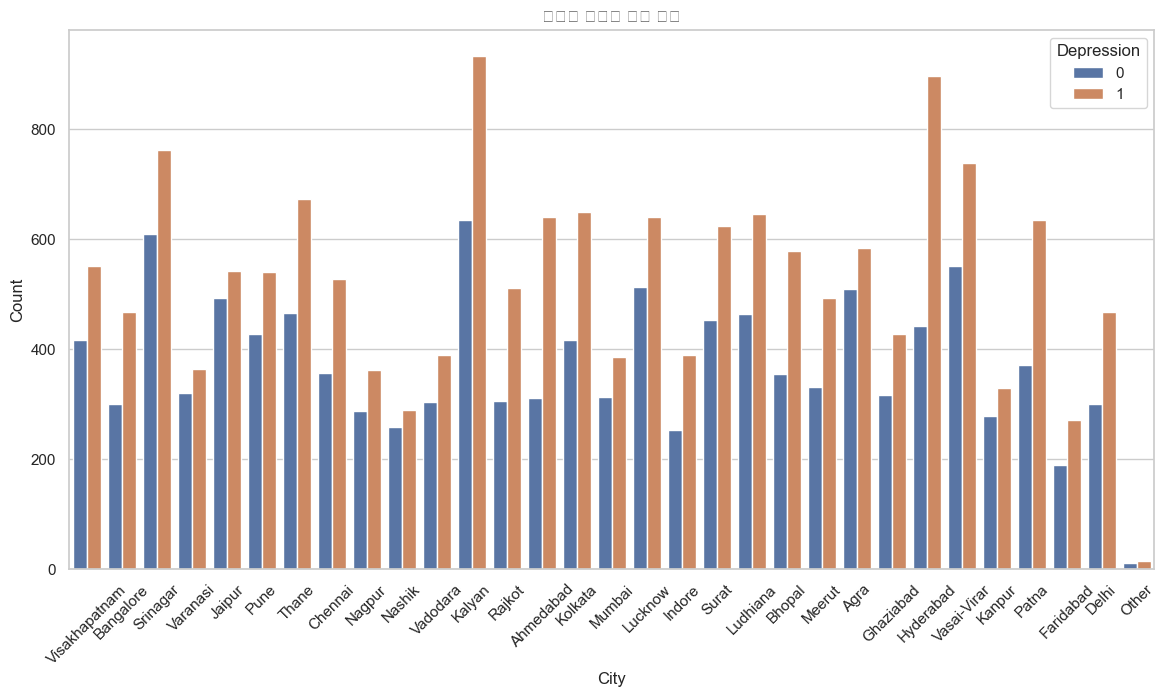

In [2867]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='City', hue='Depression')
plt.xticks(rotation=45)
plt.title('도시별 우울증 여부 분포')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [2869]:
# Working_prof_train_df['Profession'].unique()

In [2870]:
# #정상값 리스트
# valid_professions = [
#     'Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
#     'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
#     'Plumber', 'Accountant', 'Entrepreneur', 'UX/UI Designer',
#     'Content Writer', 'Missing', 'Educational Consultant',
#     'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
#     'Architect', 'Mechanical Engineer', 'HR Manager', 'Consultant',
#     'Judge', 'Researcher', 'Marketing Manager', 'Pilot',
#     'Graphic Designer', 'Travel Consultant', 'Digital Marketer',
#     'Lawyer', 'Research Analyst', 'Sales Executive',
#     'Customer Support', 'Doctor', 'Unemployed', 'Investment Banker',
#     'Family Consultant', 'Dev', 'Academic', 'Profession',
#     'FamilyVirar', 'City Manager', 'Medical Doctor', 'Analyst'
# ]
# # 해당 컬럼 이름
# col = 'Profession'

# # 이상치가 포함된 행 제거
# Working_prof_train_df = Working_prof_train_df[Working_prof_train_df[col].isin(valid_professions)]

In [2871]:
# Working_prof_train_df['Profession'].unique()

# feature 
---


In [2872]:
Student_train_df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,degree_group_Depression_Risk,City_Depression_Risk
2,2,33.0,5.0,8.97,2.0,5.5,1.0,1,3.0,1.0,0,1,0.533046,0.569659
8,8,24.0,2.0,5.90,5.0,5.5,2.0,0,3.0,2.0,1,0,0.578163,0.608866
26,26,31.0,3.0,7.03,5.0,4.0,2.0,0,9.0,1.0,1,0,0.536752,0.556122
30,30,28.0,3.0,5.59,2.0,7.5,2.0,1,4.0,5.0,1,1,0.548156,0.531387
32,32,25.0,4.0,8.13,3.0,5.5,2.0,1,1.0,1.0,0,0,0.548156,0.524131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,27.0,5.0,5.75,5.0,5.5,2.0,1,7.0,1.0,1,0,0.707778,0.579777
140686,140686,27.0,2.0,9.40,3.0,4.0,2.0,0,0.0,3.0,1,0,0.578163,0.582358
140689,140689,31.0,3.0,6.61,4.0,5.5,2.0,0,12.0,2.0,0,0,0.553628,0.587852
140690,140690,18.0,5.0,6.88,2.0,4.0,2.0,1,10.0,5.0,0,1,0.707778,0.582358


### CGPA 관계 :(

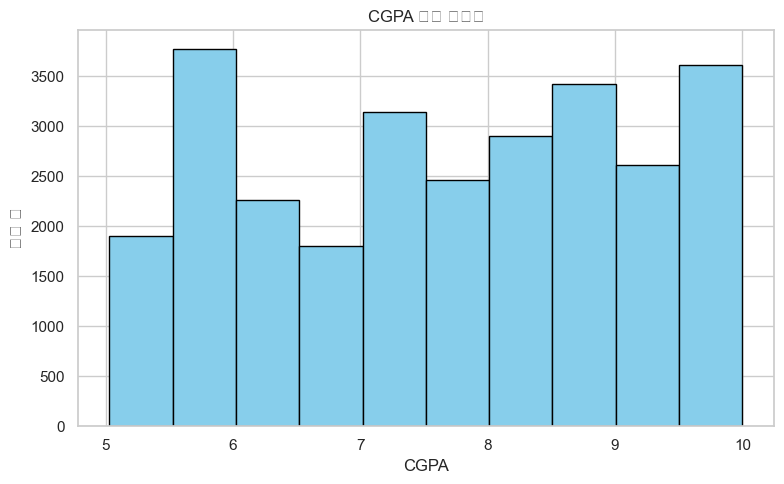

In [2873]:
plt.figure(figsize=(8, 5))
plt.hist(Student_train_df['CGPA'], bins=10, edgecolor='black', color='skyblue')
plt.title('CGPA 분포 그래프')
plt.xlabel('CGPA')
plt.ylabel('학생 수')
plt.grid(True)
plt.tight_layout()
plt.show()

In [2874]:
correlation = Student_train_df[['CGPA', 'Depression']].corr()
print(correlation)

                CGPA  Depression
CGPA        1.000000    0.021829
Depression  0.021829    1.000000


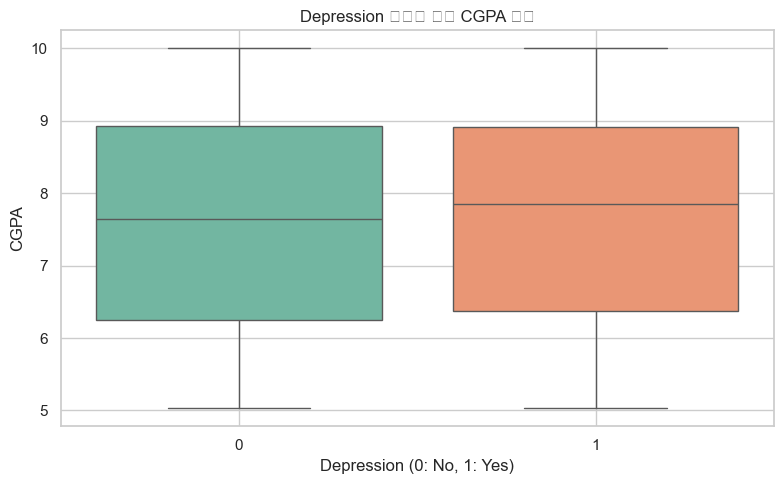

In [2875]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='CGPA', data=Student_train_df, palette='Set2')
plt.title('Depression 여부에 따른 CGPA 분포')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('CGPA')
plt.grid(True)
plt.tight_layout()
plt.show()

In [2876]:
Student_train_df['Sleep_CGPA_Interaction'] = Student_train_df['Sleep Duration'] * Student_train_df['CGPA']

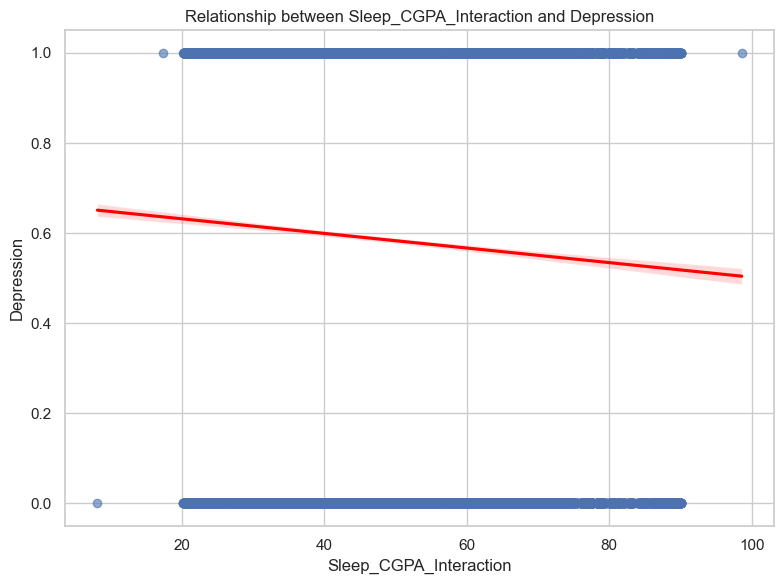

In [2877]:
# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Sleep_CGPA_Interaction',
    y='Depression',
    data=Student_train_df,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Relationship between Sleep_CGPA_Interaction and Depression')
plt.xlabel('Sleep_CGPA_Interaction')
plt.ylabel('Depression')
plt.grid(True)
plt.tight_layout()
plt.show()

- Sleep_CGPA_Interaction 값이 높을 수록 Depression이 낮아지는 경향
- 수면시간이 많고 학점이 높은 학생일 수록 우울 수준이 낮음
- 기울기가 크지 않은 것을 보아 영향력이 크지 않음

In [2878]:
correlation = Student_train_df[['Sleep_CGPA_Interaction', 'Depression']].corr()
print(correlation)

                        Sleep_CGPA_Interaction  Depression
Sleep_CGPA_Interaction                1.000000   -0.057752
Depression                           -0.057752    1.000000


- 통계적으로 봐도 매우 작은 음의 상관관계임 -> 삭제

In [2879]:
Student_train_df.drop(['Sleep_CGPA_Interaction'],axis=1,inplace=True)

### 학업 스트레스 관리 잘하는 학생 ( CGPA_Pressure )

In [2880]:
cgpa_norm = (Student_train_df['CGPA'] - Student_train_df['CGPA'].min()) / (Student_train_df['CGPA'].max() - Student_train_df['CGPA'].min())
pressure_norm = (Student_train_df['Academic Pressure'] - Student_train_df['Academic Pressure'].min()) / (Student_train_df['Academic Pressure'].max() - Student_train_df['Academic Pressure'].min())

# 균형 점수: 학점 높고 스트레스 낮으면 높은 값 (양수 좋음, 음수 나쁨)
Student_train_df['CGPA_Stress_Balance'] = cgpa_norm - pressure_norm

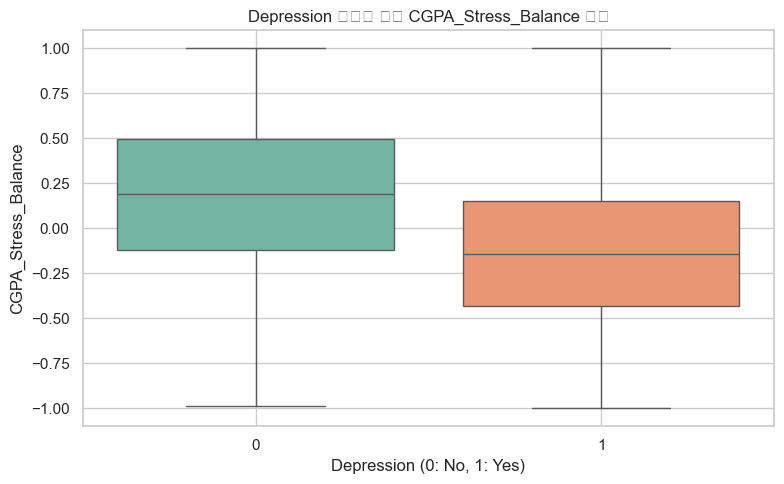

In [2881]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='CGPA_Stress_Balance', data=Student_train_df, palette='Set2')
plt.title('Depression 여부에 따른 CGPA_Stress_Balance 분포')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('CGPA_Stress_Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

- 통계적으로 유의하지 않다고 판단 -> 삭제

In [2882]:
Student_train_df.drop(['CGPA_Stress_Balance'],axis=1,inplace=True)

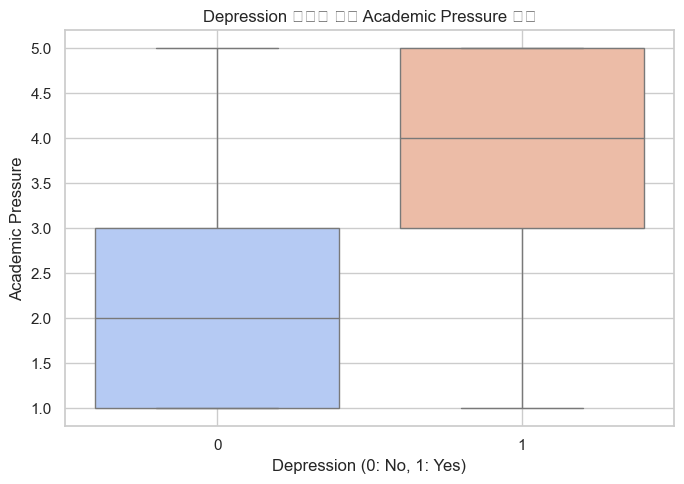

In [2883]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Depression', y='Academic Pressure', data=Student_train_df, palette='coolwarm')
plt.title('Depression 여부에 따른 Academic Pressure 분포')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Academic Pressure')
plt.grid(True)
plt.tight_layout()
plt.show()

In [2884]:
# Student_train_df.drop(['CGPA'],axis=1,inplace=True)

### Age 와 Depression 의 관계

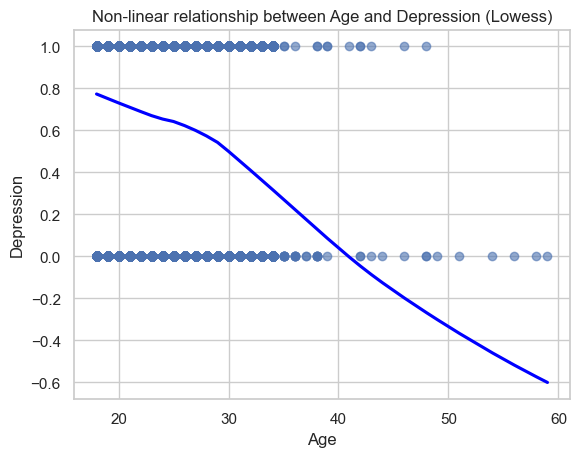

In [2885]:
sns.regplot(x='Age', y='Depression', data=Student_train_df, lowess=True, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Non-linear relationship between Age and Depression (Lowess)')
plt.show()

## Gender 와 Depression 의 관계

In [2886]:
# plt.figure(figsize=(6,6))
# sns.boxplot(x='Gender', y='Depression', data=Student_train_df)
# plt.title('Depression Scores by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Depression')
# plt.show()

## Study Satisfaction과 Depression의 관계

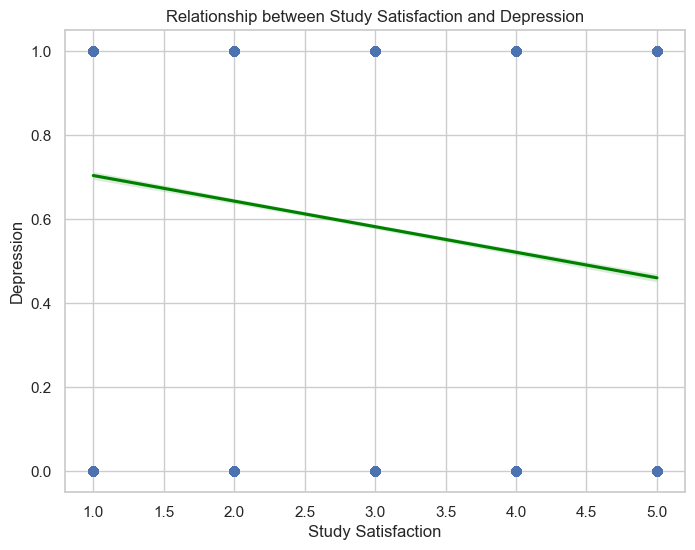

In [2887]:
plt.figure(figsize=(8,6))
sns.regplot(x='Study Satisfaction', y='Depression', data=Student_train_df, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Relationship between Study Satisfaction and Depression')
plt.xlabel('Study Satisfaction')
plt.ylabel('Depression')
plt.grid(True)
plt.show()

In [2888]:
corr = Student_train_df[['Study Satisfaction', 'Depression']].corr()
print(corr)

                    Study Satisfaction  Depression
Study Satisfaction            1.000000   -0.168119
Depression                   -0.168119    1.000000


In [2889]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 원본 변수 추출
cgpa = Student_train_df['CGPA'].values.reshape(-1,1)
study_sat = Student_train_df['Study Satisfaction'].values.reshape(-1,1)

# 스케일러 생성
scaler_cgpa = StandardScaler()
scaler_study = StandardScaler()

# 각각 스케일링
cgpa_scaled = scaler_cgpa.fit_transform(cgpa).flatten()
study_sat_scaled = scaler_study.fit_transform(study_sat).flatten()

# 새로운 컬럼 추가
Student_train_df['CGPA_scaled'] = cgpa_scaled
Student_train_df['Study Satisfaction_scaled'] = study_sat_scaled

# 피처 엔지니어링
Student_train_df['Interaction'] = Student_train_df['CGPA_scaled'] * Student_train_df['Study Satisfaction_scaled']
Student_train_df['Sum'] = Student_train_df['CGPA_scaled'] + Student_train_df['Study Satisfaction_scaled']
Student_train_df['Difference'] = Student_train_df['Study Satisfaction_scaled'] - Student_train_df['CGPA_scaled']
# 비율은 0 나누기 위험 있어서 조심, scaled 값이 음수도 있을 수 있으니 보통 안 씀
# 대신 절댓값으로 처리하거나, log 변환도 가능하지만 여기선 제외

# 결과 일부 출력
print(Student_train_df[['CGPA_scaled', 'Study Satisfaction_scaled', 'Interaction', 'Sum', 'Difference']].head())

    CGPA_scaled  Study Satisfaction_scaled  Interaction       Sum  Difference
2      0.895493                  -0.694659    -0.622062  0.200834   -1.590152
8     -1.200824                   1.510858    -1.814275  0.310034    2.711682
26    -0.429216                   1.510858    -0.648484  1.081642    1.940074
30    -1.412505                  -0.694659     0.981209 -2.107163    0.717846
32     0.321908                   0.040513     0.013042  0.362421   -0.281395


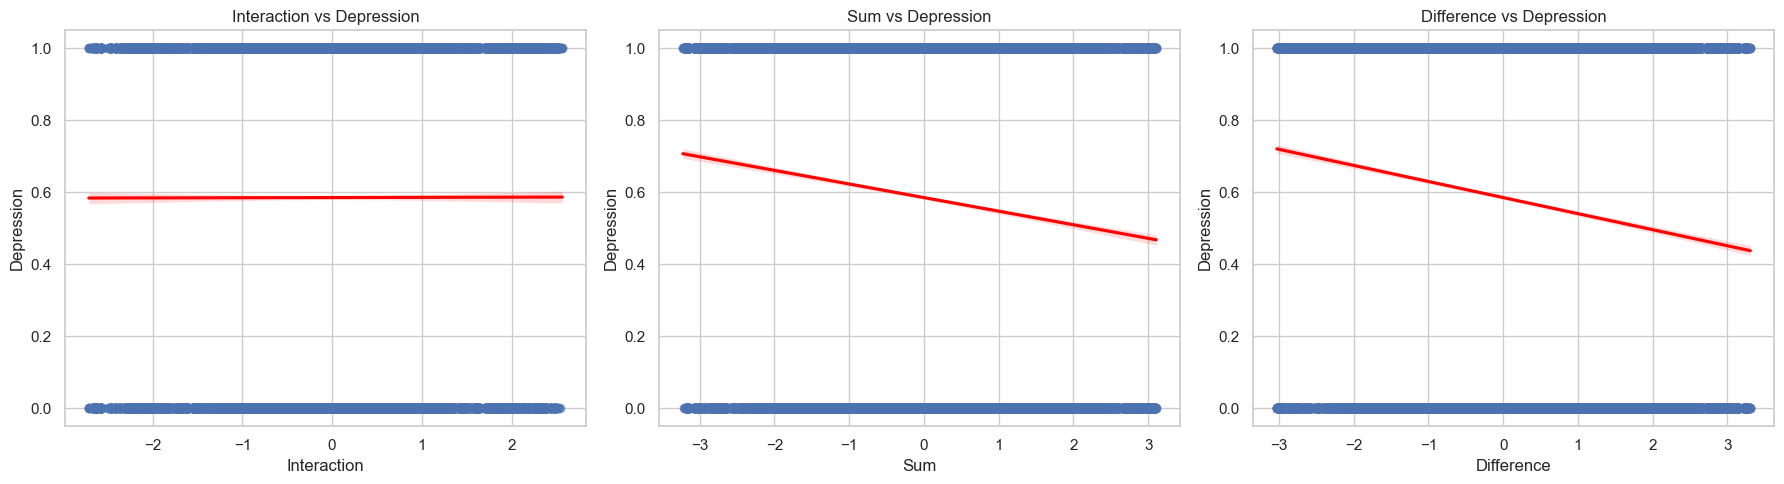

In [2890]:
features = ['Interaction', 'Sum', 'Difference']

plt.figure(figsize=(18,5))

for i, feat in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=feat, y='Depression', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'{feat} vs Depression')
    plt.xlabel(feat)
    plt.ylabel('Depression')

plt.tight_layout()
plt.show()

관계 크지 않음 -> 삭제

In [2891]:
Student_train_df.drop(['CGPA_scaled','Study Satisfaction_scaled','Interaction','Sum','Difference','CGPA'],axis=1,inplace=True)

## Work/Study Hours 와 Depression의 관계

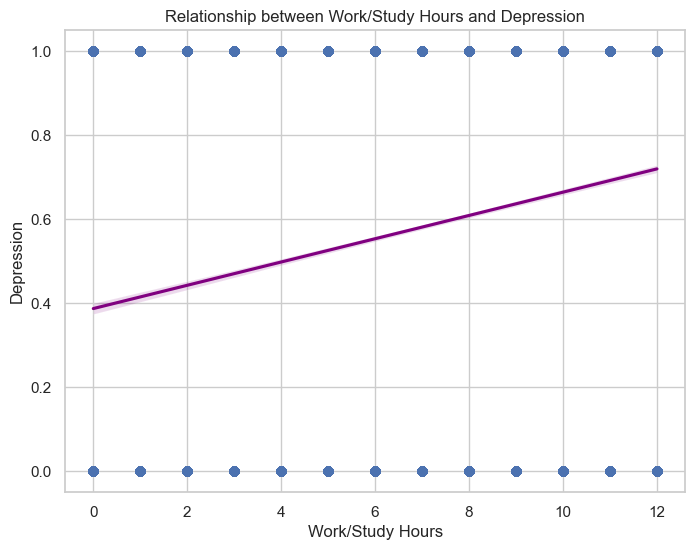

In [2892]:
plt.figure(figsize=(8,6))
sns.regplot(x='Work/Study Hours', y='Depression', data=Student_train_df, scatter_kws={'alpha':0.6}, line_kws={'color':'purple'})
plt.title('Relationship between Work/Study Hours and Depression')
plt.xlabel('Work/Study Hours')
plt.ylabel('Depression')
plt.grid(True)
plt.show()

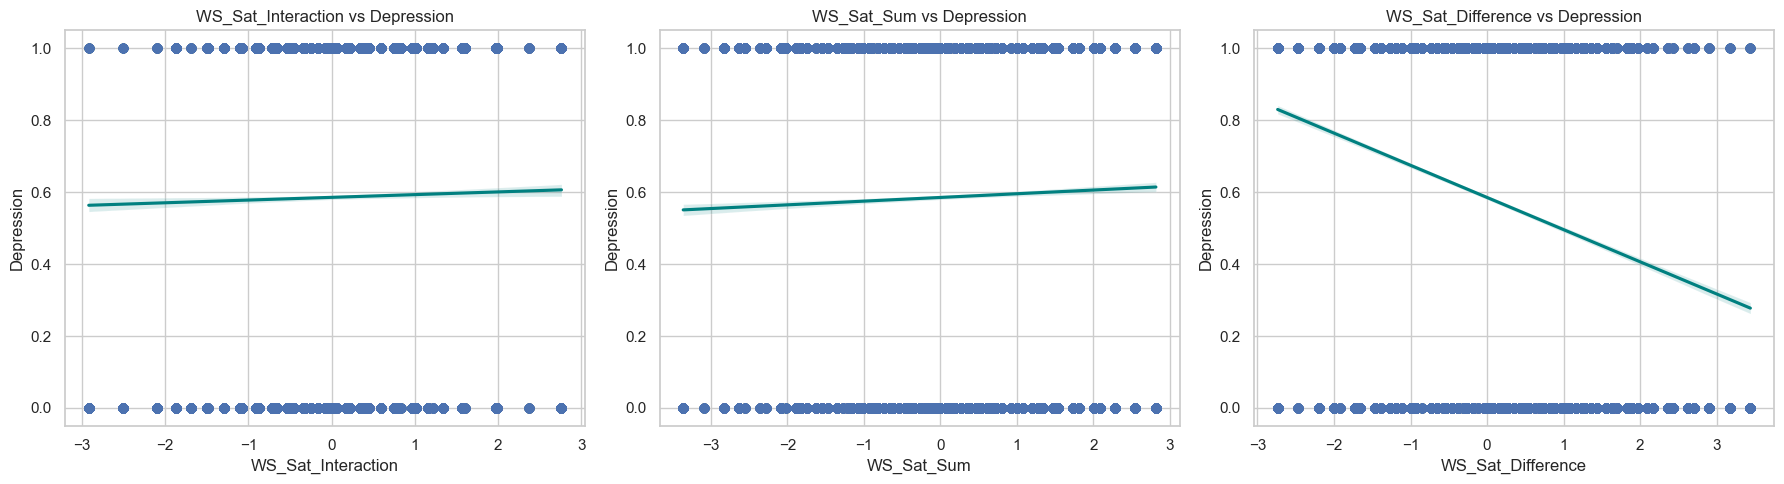

In [2893]:
from sklearn.preprocessing import StandardScaler

ws_hours = Student_train_df['Work/Study Hours'].values.reshape(-1,1)
study_sat = Student_train_df['Study Satisfaction'].values.reshape(-1,1)

scaler_ws = StandardScaler()
scaler_sat = StandardScaler()

ws_scaled = scaler_ws.fit_transform(ws_hours).flatten()
sat_scaled = scaler_sat.fit_transform(study_sat).flatten()

Student_train_df['Work/Study Hours_scaled'] = ws_scaled
Student_train_df['Study Satisfaction_scaled'] = sat_scaled

Student_train_df['WS_Sat_Interaction'] = Student_train_df['Work/Study Hours_scaled'] * Student_train_df['Study Satisfaction_scaled']
Student_train_df['WS_Sat_Sum'] = Student_train_df['Work/Study Hours_scaled'] + Student_train_df['Study Satisfaction_scaled']
Student_train_df['WS_Sat_Difference'] = Student_train_df['Study Satisfaction_scaled'] - Student_train_df['Work/Study Hours_scaled']

features = ['WS_Sat_Interaction', 'WS_Sat_Sum', 'WS_Sat_Difference']

plt.figure(figsize=(18,5))

for i, feat in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=feat, y='Depression', data=Student_train_df, scatter_kws={'alpha':0.6}, line_kws={'color':'teal'})
    plt.title(f'{feat} vs Depression')
    plt.xlabel(feat)
    plt.ylabel('Depression')

plt.tight_layout()
plt.show()

In [2894]:
import numpy as np
import statsmodels.api as sm

# 피처와 타겟 선택
X = Student_train_df['WS_Sat_Difference']
y = Student_train_df['Depression']

# NaN 또는 inf가 포함된 행 제거
mask = (~X.isna()) & (~y.isna()) & (~np.isinf(X)) & (~np.isinf(y))
X = X[mask]
y = y[mask]

# 상수항 추가
X = sm.add_constant(X)

# 회귀분석
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Depression   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2046.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        05:14:40   Log-Likelihood:                -18842.
No. Observations:               27891   AIC:                         3.769e+04
Df Residuals:                   27889   BIC:                         3.770e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5855      0.00

-> WS_Sat_Difference가 클수록 (즉, 만족도는 높은데 일/공부 시간이 적을수록) → 우울감이 감소하는 경향이 있음      
-> 유의미     
-> 불필요한 행 삭제

In [2895]:
Student_train_df.drop(['Work/Study Hours_scaled','WS_Sat_Interaction','WS_Sat_Sum'],axis=1,inplace=True)

## 3. 원-핫 인코딩
---
<span style="background-color: #ffd33d">Null 컬럼을 제거 할지 고민됨</span>

In [2896]:
isnull_series = Working_prof_train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Sleep Duration      24
Work Pressure       20
Job Satisfaction    17
Financial Stress     1
dtype: int64


In [2897]:
isnull_series = Student_train_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Study Satisfaction           10
WS_Sat_Difference            10
Study Satisfaction_scaled    10
Academic Pressure             9
Sleep Duration                6
Financial Stress              3
dtype: int64


In [2898]:
print('get_dummies() 수행 전 데이터 Shape:', Working_prof_train_df.shape)
Working_prof_train_df_ohe = pd.get_dummies(Working_prof_train_df)
print('get_dummies() 수행 후 데이터 Shape:', Working_prof_train_df_ohe.shape)

null_column_count = Working_prof_train_df_ohe.isnull().sum()[Working_prof_train_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', Working_prof_train_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (112799, 11)
get_dummies() 수행 후 데이터 Shape: (112799, 11)
## Null 피처의 Type :
 Work Pressure       float64
Job Satisfaction    float64
Sleep Duration      float64
Financial Stress    float64
dtype: object


In [2899]:
print('get_dummies() 수행 전 데이터 Shape:', Student_train_df.shape)
Student_train_df_ohe = pd.get_dummies(Student_train_df)
print('get_dummies() 수행 후 데이터 Shape:', Student_train_df_ohe.shape)

null_column_count = Student_train_df_ohe.isnull().sum()[Student_train_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', Student_train_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (27901, 15)
get_dummies() 수행 후 데이터 Shape: (27901, 15)
## Null 피처의 Type :
 Academic Pressure            float64
Study Satisfaction           float64
Sleep Duration               float64
Financial Stress             float64
Study Satisfaction_scaled    float64
WS_Sat_Difference            float64
dtype: object


In [2900]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    train_copy = df.copy()

    y_target = train_copy['Depression']
    X_features = train_copy.drop(['Depression', 'id'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                        test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test

X_Working_train, X_Working_test, y_Working_train, y_Working_test = get_train_test_dataset(Working_prof_train_df_ohe)
X_student_train, X_student_test, y_student_train, y_student_test = get_train_test_dataset(Student_train_df_ohe)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


model = XGBClassifier(
    n_estimators=100,       # 트리 개수 (적당함)
    max_depth=4,            # 과적합 방지용 적당한 깊이
    learning_rate=0.1,      # 기본 학습률
    subsample=0.8,          # 전체 샘플 중 일부만 사용 → 일반화 성능↑
    colsample_bytree=0.8,   # 피처 중 일부만 사용 → 과적합 방지
    use_label_encoder=False,
    eval_metric='logloss',  # 분류 문제의 표준 평가지표
    random_state=42,
    n_jobs=-1               # 병렬 처리
)


student_model = XGBClassifier(
    n_estimators=100,       # 트리 개수 (적당함)
    max_depth=4,            # 과적합 방지용 적당한 깊이
    learning_rate=0.1,      # 기본 학습률
    subsample=0.8,          # 전체 샘플 중 일부만 사용 → 일반화 성능↑
    colsample_bytree=0.8,   # 피처 중 일부만 사용 → 과적합 방지
    use_label_encoder=False,
    eval_metric='logloss',  # 분류 문제의 표준 평가지표
    random_state=42,
    n_jobs=-1               # 병렬 처리
)
working_model = XGBClassifier(
    n_estimators=100,       # 트리 개수 (적당함)
    max_depth=4,            # 과적합 방지용 적당한 깊이
    learning_rate=0.1,      # 기본 학습률
    subsample=0.8,          # 전체 샘플 중 일부만 사용 → 일반화 성능↑
    colsample_bytree=0.8,   # 피처 중 일부만 사용 → 과적합 방지
    use_label_encoder=False,
    eval_metric='logloss',  # 분류 문제의 표준 평가지표
    random_state=42,
    n_jobs=-1               # 병렬 처리
)

# 학습
student_model.fit(X_student_train, y_student_train)
working_model.fit(X_Working_train, y_Working_train)

#예측
student_preds_proba = student_model.predict_proba(X_student_test)[:, 1]
working_preds_proba = working_model.predict_proba(X_Working_test)[:, 1]


In [2901]:
class_distribution = y_Working_train.value_counts(normalize=True)
print(class_distribution)

Depression
0    0.91816
1    0.08184
Name: proportion, dtype: float64


In [2902]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

In [2903]:
print("🎓 학생 모델 평가 결과:")
evaluate_model(y_student_test, student_preds_proba)

🎓 학생 모델 평가 결과:
Accuracy:  0.8427
Precision: 0.8539
Recall:    0.8823
F1 Score:  0.8678


In [2904]:
print("\n💼 직장인 모델 평가 결과:")
evaluate_model(y_Working_test, working_preds_proba)


💼 직장인 모델 평가 결과:
Accuracy:  0.9605
Precision: 0.8112
Recall:    0.6735
F1 Score:  0.7360


# test 데이터

In [2905]:
test_df= pd.read_csv('ExploringMentalHealthData/test.csv')

test_df_cp = test_df.copy()

In [2906]:
test_df.drop(['id','Name','Gender'], axis=1, inplace=True)

Working_prof_test_df = test_df[test_df['Working Professional or Student'] == 'Working Professional']
Student_test_df = test_df[test_df['Working Professional or Student'] == 'Student']

Working_prof_test_df.drop(['Working Professional or Student'], axis=1, inplace=True)

Student_test_df.drop(['Working Professional or Student'], axis=1, inplace=True)

cols_to_drop = ['Academic Pressure', 'Study Satisfaction', 'CGPA', 'Profession']
Working_prof_test_df = Working_prof_test_df.drop(columns=cols_to_drop)

cols_to_drop = ['Work Pressure', 'Job Satisfaction', 'Profession']
Student_test_df = Student_test_df.drop(columns=cols_to_drop)

# Working_prof_test_df['Profession'] = Working_prof_test_df['Profession'].fillna('Missing')

# 정상적인 수면 시간 값 목록
Working_prof_test_df['Sleep Duration'] = Working_prof_test_df['Sleep Duration'].apply(lambda x: x if x in valid_sleep_values else np.nan)

valid_sleep_values = [
    'More than 8 hours', 'Less than 5 hours',
    '1-2 hours', '1-3 hours', '2-3 hours', '3-4 hours', '4-5 hours',
    '4-6 hours', '5-6 hours', '6-7 hours', '6-8 hours',
    '7-8 hours', '8-9 hours', '9-11 hours', '10-11 hours'
]

Student_test_df['Sleep Duration'] = Student_test_df['Sleep Duration'].apply(lambda x: x if x in valid_sleep_values else np.nan)

#일관된 값으로 변환하는 코드
def convert_sleep_duration(value):
    if value == 'More than 8 hours':
        return 9.0
    elif value == 'Less than 5 hours':
        return 4.0
    else:
        # "숫자-숫자 hours" 형태일 때 중간값 계산
        try:
            parts = value.replace(' hours', '').split('-')
            if len(parts) == 2:
                return (float(parts[0]) + float(parts[1])) / 2
            else:
                return float(parts[0])  # 혹시 단일 숫자면 그대로
        except:
            return None  # 변환 불가한 값은 None 처리

list = [Working_prof_test_df, Student_test_df]

# 적용 예시
for df in list: 
    df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)

Working_prof_test_df['Sleep Duration'].fillna(5.5)

Student_test_df['Sleep Duration'].fillna(5.5)

list = [Working_prof_test_df, Student_test_df]

# for df in list : 
#     df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Working_prof_test_df['Dietary Habits'].unique()

valid_dietary = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy']

abnormal_rows = Working_prof_test_df[~Working_prof_test_df['Dietary Habits'].isin(valid_dietary)]

abnormal_rows

valid_dietary = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy']

abnormal_rows = Student_test_df[~Student_test_df['Dietary Habits'].isin(valid_dietary)]

abnormal_rows


diet_map = {
    'No Healthy': 0,
    'Unhealthy': 1,
    'Less than Healthy': 2,
    'Less Healthy': 2,
    'Moderate': 3,
    'Healthy': 4,
    'More Healthy': 5
}

# Working_prof_test_df 처리
Working_prof_test_df['Dietary Habits'] = pd.DataFrame({
    'Dietary Habits': ['Healthy', 'Unknown', 'Unhealthy', 'Less Healthy', 'Bad Diet']
})

Working_prof_test_df['Dietary Habits'] = Working_prof_test_df['Dietary Habits'].map(diet_map)

# Student_test_df 처리
Student_test_df['Dietary Habits'] = pd.DataFrame({
    'Dietary Habits': ['Healthy', 'Unknown', 'Unhealthy', 'Less Healthy', 'Bad Diet']
})

Student_test_df['Dietary Habits'] = Student_test_df['Dietary Habits'].map(diet_map)

Working_prof_test_df['Dietary Habits'].median()

Working_prof_test_df['Dietary Habits'] = Working_prof_test_df['Dietary Habits'].fillna(2.0)

Student_test_df['Dietary Habits'].median()

Student_test_df['Dietary Habits'] = Student_test_df['Dietary Habits'].fillna(2.0)


# 정상적인 학위 및 그룹핑 사전
degree_group_map = {
    # 의학/보건
    'MD': 'Medical',
    'MBBS': 'Medical',
    'B.Pharm': 'Pharmacy',
    'M.Pharm': 'Pharmacy',
    'MPharm': 'Pharmacy',
    'P.Pharm': 'Pharmacy',
    'S.Pharm': 'Pharmacy',
    'N.Pharm': 'Pharmacy',

    # 공학/기술
    'B.Tech': 'Engineering',
    'M.Tech': 'Engineering',
    'ME': 'Engineering',
    'MTech': 'Engineering',
    'M_Tech': 'Engineering',
    'BE': 'Engineering',
    'BCA': 'Engineering',
    'MCA': 'Engineering',
    'E.Tech': 'Engineering',
    'S.Tech': 'Engineering',
    'LLTech': 'Engineering',
    'LLCom': 'Engineering',

    # 인문/사회/비즈니스
    'BBA': 'Business',
    'MBA': 'Business',
    'M. Business Analyst': 'Business',
    'B.Com': 'Commerce',
    'M.Com': 'Commerce',
    'P.Com': 'Commerce',
    'LLB': 'Law',
    'LLM': 'Law',
    'LLBA': 'Law',
    'LL.Com': 'Law',
    'LL B.Ed': 'Education',
    'B.Ed': 'Education',
    'M.Ed': 'Education',
    'L.Ed': 'Education',
    'K.Ed': 'Education',
    'LLEd': 'Education',
    'BEd': 'Education',

    # 과학
    'BSc': 'Science',
    'MSc': 'Science',
    'B.Sc': 'Science',

    # 기타, 건축, 호텔경영 등
    'BHM': 'Hospitality',
    'MHM': 'Hospitality',
    'B.Arch': 'Architecture',
    'M.Arch': 'Architecture',
    'BArch': 'Architecture',
    'B.B.Arch': 'Architecture',

    # 학위 및 학교 졸업
    'PhD': 'PhD',
    'Class 12': 'School',
    'Class 11': 'School',
}

Student_test_df['degree_group'] = Student_test_df['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))
Working_prof_test_df['degree_group'] = Working_prof_test_df['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))

# 각 그룹별 우울률 (Depression 평균값)
degree_group_depression_rate = Student_test_df.groupby('degree_group')['Depression'].mean()
# 기존 Degree 컬럼을 우울률 기반으로 수치형 매핑
Student_test_df['degree_group_Depression_Risk'] = Student_test_df['degree_group'].map(degree_group_depression_rate)
# 우울률 계산이 안 된 그룹은 0 또는 전체 평균으로 대체
Student_test_df['degree_group_Depression_Risk'] = Student_test_df['degree_group_Depression_Risk'].fillna(Student_test_df['Depression'].mean())
Student_test_df.drop(['degree_group'],axis=1,inplace=True)
Working_prof_test_df.drop(['degree_group'],axis=1,inplace=True)

# 자살률 인코딩
list = [Working_prof_test_df, Student_test_df]

for df in list : 
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})


# Student_test_df = Student_test_df[~((Student_test_df['Age'] >= 40) & (Student_test_df['Degree_Group'] == 'School'))]

# list = [Working_prof_test_df, Student_test_df]

for df in list : 
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# 정상적인 도시 이름 리스트 (중복 제거된 신뢰 가능한 도시들)
valid_cities_map = {
    'Visakhapatnam', 'Bangalore', 'Varanasi', 'Jaipur', 'Pune',
    'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan',
    'Rajkot', 'Srinagar', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
    'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
    'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Patna', 'Faridabad',
    'Delhi', 'Kanpur', 'Morena', 'Gurgaon'
}

Student_test_df['City'] = Student_test_df['City'].apply(lambda x: x if x in valid_cities_map else 'Other')
Working_prof_test_df['City'] = Working_prof_test_df['City'].apply(lambda x: x if x in valid_cities_map else 'Other')
# 각 도시별 우울률 (Depression 평균값)
city_depression_rate = Student_test_df.groupby('City')['Depression'].mean()
# 기존 City 컬럼을 우울률 기반으로 수치형 매핑
Student_test_df['City_Depression_Risk'] = Student_test_df['City'].map(city_depression_rate)
# 우울률 계산이 안 된 도시는 0 또는 전체 평균으로 대체
Student_test_df['City_Depression_Risk'] = Student_test_df['City_Depression_Risk'].fillna(Student_test_df['Depression'].mean())
Student_test_df.drop(['City'],axis=1,inplace=True)
Working_prof_test_df.drop(['City'],axis=1,inplace=True)


# #정상값 리스트
# valid_professions = [
#     'Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
#     'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
#     'Plumber', 'Accountant', 'Entrepreneur', 'UX/UI Designer',
#     'Content Writer', 'Missing', 'Educational Consultant',
#     'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
#     'Architect', 'Mechanical Engineer', 'HR Manager', 'Consultant',
#     'Judge', 'Researcher', 'Marketing Manager', 'Pilot',
#     'Graphic Designer', 'Travel Consultant', 'Digital Marketer',
#     'Lawyer', 'Research Analyst', 'Sales Executive',
#     'Customer Support', 'Doctor', 'Unemployed', 'Investment Banker',
#     'Family Consultant', 'Dev', 'Academic', 'Profession',
#     'FamilyVirar', 'City Manager', 'Medical Doctor', 'Analyst'
# ]
# # 해당 컬럼 이름
# col = 'Profession'

# # 이상치가 포함된 행 제거
# Working_prof_test_df = Working_prof_test_df[Working_prof_test_df[col].isin(valid_professions)]

# Student_test_df['Academic Pressure'].fillna(3.0)


##### Feauter #######
from sklearn.preprocessing import StandardScaler

ws_hours = Student_test_df['Work/Study Hours'].values.reshape(-1,1)
study_sat = Student_test_df['Study Satisfaction'].values.reshape(-1,1)

scaler_ws = StandardScaler()
scaler_sat = StandardScaler()

ws_scaled = scaler_ws.fit_transform(ws_hours).flatten()
sat_scaled = scaler_sat.fit_transform(study_sat).flatten()

Student_test_df['Work/Study Hours_scaled'] = ws_scaled
Student_test_df['Study Satisfaction_scaled'] = sat_scaled


Student_test_df['WS_Sat_Difference'] = Student_test_df['Study Satisfaction_scaled'] - Student_test_df['Work/Study Hours_scaled']
Student_test_df.drop(['Work/Study Hours_scaled','Study Satisfaction_scaled'],axis=1,inplace=True)

KeyError: 'Column not found: Depression'

In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', Working_prof_test_df.shape)
Working_prof_test_df_ohe = pd.get_dummies(Working_prof_test_df)
print('get_dummies() 수행 후 데이터 Shape:', Working_prof_test_df_ohe.shape)

null_column_count = Working_prof_test_df_ohe.isnull().sum()[Working_prof_test_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', Working_prof_test_df_ohe.dtypes[null_column_count.index])

print('get_dummies() 수행 전 데이터 Shape:', Student_test_df.shape)
Student_test_df_ohe = pd.get_dummies(Student_test_df)
print('get_dummies() 수행 후 데이터 Shape:', Student_test_df_ohe.shape)

null_column_count = Student_test_df_ohe.isnull().sum()[Student_test_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', Student_test_df_ohe.dtypes[null_column_count.index])



### 테스트 데이터 준비 과정
---
1. Feature 정렬 확인
2. 예측 수행
3. Submission 파일 생성

In [ ]:
# Working_prof_test_X = Working_prof_test_df_ohe.drop('id', axis=1).reindex(columns=X_Working_train.columns)

In [ ]:
# working_test_preds = working_model.predict_proba(Working_prof_test_X)[:, 1]

In [ ]:
# working_preds = (working_preds_proba >= 0.5).astype(int)

# Ieun

In [ ]:
# train에서 학습할 때 쓴 피처셋 가져오기
train_student_cols = X_student_train.columns
train_working_cols = X_Working_train.columns

In [ ]:
# 학생 test 데이터 컬럼 맞추기
for col in train_student_cols:
    if col not in Student_test_df_ohe.columns:
        Student_test_df_ohe[col] = 0
Student_test_df_ohe = Student_test_df_ohe[train_student_cols]

# 직장인 test 데이터 컬럼 맞추기
for col in train_working_cols:
    if col not in Working_prof_test_df_ohe.columns:
        Working_prof_test_df_ohe[col] = 0
Working_prof_test_df_ohe = Working_prof_test_df_ohe[train_working_cols]

### 3) 모델로 예측 확률 산출

In [ ]:
student_preds_proba = student_model.predict_proba(Student_test_df_ohe)[:, 1]
working_preds_proba = working_model.predict_proba(Working_prof_test_df_ohe)[:, 1]

In [ ]:
student_preds = (student_preds_proba >= 0.1).astype(int)
working_preds = (working_preds_proba >= 0.1).astype(int)

In [ ]:
# 학생, 직장인 id 별로 분리
student_ids = test_df_cp.loc[test_df_cp['Working Professional or Student'] == 'Student', 'id']
working_ids = test_df_cp.loc[test_df_cp['Working Professional or Student'] == 'Working Professional', 'id']

# 학생 결과 DataFrame 생성
student_sub = pd.DataFrame({
    'id': student_ids.values,
    'depression': student_preds
})

# 직장인 결과 DataFrame 생성
working_sub = pd.DataFrame({
    'id': working_ids.values,
    'depression': working_preds
})

# 둘 합치기
submission_df = pd.concat([student_sub, working_sub], axis=0)

# id 순서대로 정렬 (필요 시)
submission_df = submission_df.sort_values(by='id').reset_index(drop=True)

In [ ]:
submission_df.to_csv('i_v_14_submission.csv', index=False)